### Кейс 2. Отчетность по банковским резервам
Вы работаете аналитиком в отделе по работе с просроченной задолженностью в финансовом департаменте SkyBank.

Одним из важнейших показателей, связанных со взысканием, являются банковские резервы.

По закону банк должен резервировать средства по всем выданным кредитам. Работает это следующим образом. Когда клиент берет кредит, банк резервирует определенный процент от выделенной суммы. Банк не может тратить эти деньги, а только хранит их в виде наличности или на счете центрального банка. Если клиент вовремя не выплачивает кредит, то эта сумма увеличивается. И чем больше просрочка, тем больше процент. Такие меры нужны для большей стабильности банковской системы. Они удерживают банки от выдачи рискованных кредитов. А центральный банк регулирует процент обязательного резерва и может регулировать количество выдаваемых кредитов.

Полное соответствие между количеством дней просрочки и коэффициентом резервирования содержится в таблице bucket_coeff.csv.

Информация о кредитах и просрочках (на 1 августа) хранится в файле Client_Data_01082022.csv.

Расшифровка типов продукта хранится в файле credit_type.csv

### Задание

Сегодня 1 августа 2022 года. Рассчитайте суммарный объем резервов из расчета на 1 августа 2022 года.

Напишите функцию, которая будет на вход брать отчетную дату (например, 1 августа 2022 года) и датафрейм по аналогии с файлом Client_Data_01082022 и будет рассчитывать суммарный объем банковских резервов на отчетную дату.

Предположим худший возможный сценарий: начиная с 1 августа больше никто не оплатил ни копейки по своим кредитам в связи с макроэкономической ситуацией. Постройте график суммарных резервов для набора отчетных дат от 1 до 30 августа (включительно) и оцените абсолютный и процентный прирост резервов за месяц.

Постройте в питоне визуализации, которые помогут отследить размер резервов (например, в разрезе продукта или размера выданного кредита).


In [48]:
import pandas as pd

In [144]:
df_bc = pd.read_csv('bucket_coeff.csv', sep = ';')

In [145]:
df_bc

,id_bucket,range_bucket,coeff,valid_to
0,1,0-15,"0,05",01.01.3000
1,2,16-30,"0,25",01.01.3000
2,3,31-60,"0,33",01.01.3000
3,4,61-90,"0,6",01.01.3000
4,5,91-120,"0,75",01.01.3000
5,6,121-150,"0,87",01.01.3000
6,7,151-180,"0,94",01.01.3000
7,8,181+,1,01.01.3000
8,1,0-15,"0,047",01.07.2022
9,2,16-30,"0,26",01.07.2022


In [146]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_bucket     16 non-null     int64 
 1   range_bucket  16 non-null     object
 2   coeff         16 non-null     object
 3   valid_to      16 non-null     object
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [147]:
df_bc['coeff'] = df_bc['coeff'].str.replace(',', '.') #заменим запятую на точку для возможности прочтения данных как числа

In [148]:
df_bc['coeff'] = df_bc['coeff'].astype(float) #преобразуем данные в столбце в число с плавающей точкой

In [149]:
df_bc.head(3)

,id_bucket,range_bucket,coeff,valid_to
0,1,0-15,0.05,01.01.3000
1,2,16-30,0.25,01.01.3000
2,3,31-60,0.33,01.01.3000


In [76]:
df_cd = pd.read_csv('Client_Data_01082022.csv', sep = ';')

In [142]:
df_cd.head(5)

,id_credit,last_inst_payment,amt_instalment,id_credit_type
0,237789,2022-05-04,25669,888
1,238348,2022-02-18,5271,246
2,238164,2022-05-06,33732,246
3,237613,2022-03-14,6108,246
4,237745,2022-02-05,4917,888


In [83]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_credit          1474 non-null   int64 
 1   last_inst_payment  1474 non-null   object
 2   amt_instalment     1474 non-null   int64 
 3   id_credit_type     1474 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 46.2+ KB


In [84]:
df_cd['last_inst_payment'] = pd.to_datetime(df_cd['last_inst_payment'], format = '%d.%m.%Y') # преобразуем столбец в формат даты

In [85]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_credit          1474 non-null   int64         
 1   last_inst_payment  1474 non-null   datetime64[ns]
 2   amt_instalment     1474 non-null   int64         
 3   id_credit_type     1474 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 46.2 KB


In [59]:
df_ct = pd.read_csv('credit_type.csv',  sep = ';')

In [60]:
df_ct

,id_credit_type,name_credit_type
0,117,POS-special
1,118,POS-classic
2,119,POS-restruct
3,245,RC-experiment
4,246,RC
5,247,RC-special
6,248,RC-restruct
7,249,RC-new format
8,888,Cash-in classic
9,889,Cash-in restruct


In [150]:
df_ct.info() #проверим также датасет с типами продукта

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_credit_type    16 non-null     int64 
 1   name_credit_type  16 non-null     object
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


#####  1.    Сегодня 1 августа 2022 года. Рассчитайте суммарный объем резервов из расчета на 1 августа 2022 года.

In [78]:
import datetime
from datetime import datetime

In [79]:
d = '01.08.2022' #заводим дату в формате общепринятом для России
d = datetime.strptime(d,'%d.%m.%Y') #преобразуем строку в формат даты

In [92]:
#группируем датасет с выданными кредитами по длительности просрочки
df_res = df_cd.groupby((d-df_cd['last_inst_payment']).dt.days)['amt_instalment'].sum().reset_index()

In [93]:
df_res.head(3)

,last_inst_payment,amt_instalment
0,0,215800
1,1,110786
2,2,199304


In [94]:
#добавляем столбец с id сегмента
df_res['id_bucket'] = df_res['last_inst_payment'].apply(lambda x: 1 if x<=15  
                                         else (2 if  x<=30
                                               else (3 if x<=60 
                                                    else (4 if x<=90 
                                                         else (5 if x<=120
                                                              else (6 if x<=150
                                                                   else (7 if x<=180
                                                                        else 8)))))))

In [105]:
#сегментируем и подтягиваем данные по коэффициентам для сегментов
df_res = df_res.groupby('id_bucket')['amt_instalment'].sum().reset_index().merge(df_bc.loc[df_bc['valid_to'] == '01.01.3000'], on = 'id_bucket')

In [106]:
df_res

,id_bucket,amt_instalment,range_bucket,coeff,valid_to
0,1,1844061,0-15,0.05,01.01.3000
1,2,1507769,16-30,0.25,01.01.3000
2,3,3376707,31-60,0.33,01.01.3000
3,4,4369580,61-90,0.60,01.01.3000
4,5,5125241,91-120,0.75,01.01.3000
5,6,4802786,121-150,0.87,01.01.3000
6,7,4911524,151-180,0.94,01.01.3000


In [107]:
#находим сумму резерва для всей массы кредитов с учетом дней просрочки по каждому
sum_reserve = round(sum(df_res['amt_instalment']*df_res['coeff']), 2)
sum_reserve

16844393.74

Сумарный объем резервов на 01 августа 2022 должен составлять 16 844 393,74 руб.

#### 2.     Напишите функцию, которая будет на вход брать отчетную дату (например, 1 августа 2022 года) и датафрейм по аналогии с файлом Client_Data_01082022 и будет рассчитывать суммарный объем банковских резервов на отчетную дату.


In [115]:
def reserve_calc (date, df):
    date = datetime.strptime(date,'%d.%m.%Y') #преоброазование введенной строки в дату
    sum_rsrv = 0
    #группируем датасет для ускорения рассчета:
    df_res = df.groupby((date-df['last_inst_payment']).dt.days)['amt_instalment'].sum().reset_index() 
    for i in range (df_res.count()[0]):
        d = df_res.loc[i]['last_inst_payment'] #выбор коэффициента в зависимости от количества дней просрочки
        if d <=15:
            c = 0.05
        elif d<=30:
            c = 0.25
        elif d<=60:
            c = 0.33
        elif d<=90:
            c = 0.6
        elif d<=120:
            c = 0.75
        elif d<=150:
            c = 0.87
        elif d<=180:
            c = 0.94
        else:
            c = 1
        s = c*df_res.loc[i]['amt_instalment'] #рассчет суммы резерва для сегмента
        sum_rsrv +=s #сумма резерва все сегментов
    return (round(sum_rsrv, 2))   


In [116]:
reserve_calc('01.08.2022', df_cd)

16844393.74

#### 3.   Предположим худший возможный сценарий: начиная с 1 августа больше никто не оплатил ни копейки по своим кредитам в связи с макроэкономической ситуацией. Постройте график суммарных резервов для набора отчетных дат от 1 до 30 августа (включительно) и оцените абсолютный и процентный прирост резервов за месяц.

In [117]:
dates = pd.date_range('2022-08-01', periods=31, freq="D") #задаем даты для рассчета

In [154]:
def reserve_calc_to_dates(dates, df):
    sum_dict = {} #функция формирует словарь из дат и сумм резерва на дату
    for i in dates:
        i = i.strftime('%d.%m.%Y')
        sum_dict[i] = reserve_calc(i, df)
    df_reserve = pd.DataFrame.from_dict(sum_dict, orient = 'index').reset_index() #затем словарь преодразует в датафрейм
    df_reserve.columns = ('date', 'sum_reserve_to_date')
    return df_reserve   

In [155]:
df_bad_scenario = reserve_calc_to_dates(dates, df_cd)

In [156]:
df_bad_scenario.head(5)

,date,sum_reserve_to_date
0,01.08.2022,16844393.74
1,02.08.2022,16937313.39
2,03.08.2022,17028599.37
3,04.08.2022,17185518.35
4,05.08.2022,17286900.76


In [157]:
import numpy as np

In [158]:
#рассчитаем абсолютный и относительный прирост суммы резерва за период 
df_bad_scenario['sum_growth'] = df_bad_scenario['sum_reserve_to_date'] - df_bad_scenario['sum_reserve_to_date'][0]
df_bad_scenario['cum_perc'] = round(df_bad_scenario['sum_reserve_to_date']*100/df_bad_scenario['sum_reserve_to_date'][0], 0)

In [159]:
df_bad_scenario.tail(1)

,date,sum_reserve_to_date,sum_growth,cum_perc
30,31.08.2022,20277151.61,3432757.87,120.0


За месяц объем резервов должен вырасти на 3 432 757.87 руб. и составить 120% от резервов на начало месяца.

In [160]:
import matplotlib.pyplot as plt

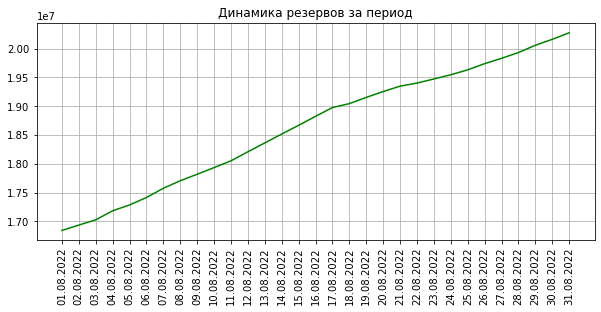

In [244]:
#построим график роста суммы резерва за период при условии отсутствия оплат
plt.figure(figsize = (10,4))
plt.title("Динамика резервов за период")
plt.plot(df_bad_scenario['date'], df_bad_scenario['sum_reserve_to_date'], color = 'g')
plt.xticks(rotation = 'vertical')
plt.grid()
plt.show()

#### 4.   Постройте в питоне визуализации, которые помогут отследить размер резервов (например, в разрезе продукта или размера выданного кредита).

In [138]:
dates = pd.date_range('2022-08-01', periods=31, freq="D") #возьмем тот же период - с 1 по 31 августа
dates

DatetimeIndex(['2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
               '2022-08-05', '2022-08-06', '2022-08-07', '2022-08-08',
               '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
               '2022-08-13', '2022-08-14', '2022-08-15', '2022-08-16',
               '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-20',
               '2022-08-21', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-27', '2022-08-28',
               '2022-08-29', '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', freq='D')

In [247]:
#функция для отслеживания резервов в разрезе продукта
def reserve_calc_in_prods (dates, df):
    #функция берет на вход исходный датафрейм с кредитами, группирует их по продукту и длительности просрочки:
    df_prod = df.merge(df_ct, on = 'id_credit_type').groupby(['name_credit_type', 'last_inst_payment'])['amt_instalment'].sum().reset_index()
    for p in df_prod['name_credit_type'].unique(): #делается срез по каждому продукту
        df = df_prod.loc[df_prod['name_credit_type'] == p]
        df_for_graf = reserve_calc_to_dates(dates, df) #к полученному срезу применяется функция рассчета сумм резерва по дням
        plt.figure(figsize = (10,4)) #построение графика для отслеживания
        plt.title("Динамика резервов для "+p)
        plt.plot(df_for_graf['date'], df_for_graf['sum_reserve_to_date'], color = 'g')
        plt.xticks(rotation = 'vertical')
        plt.grid()
        plt.show()

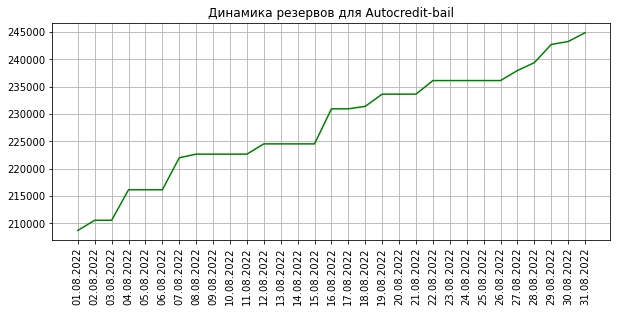

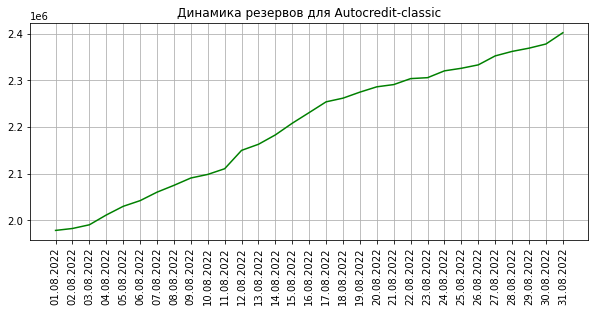

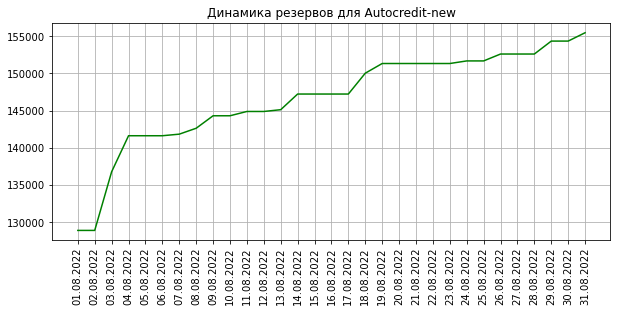

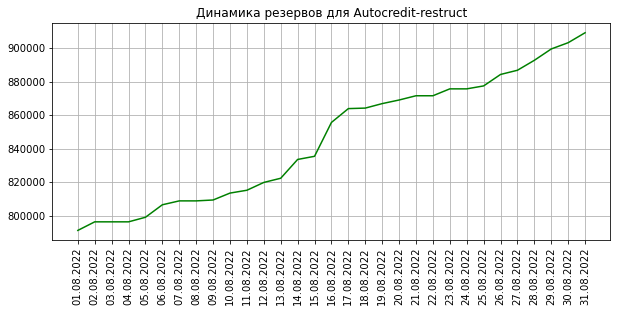

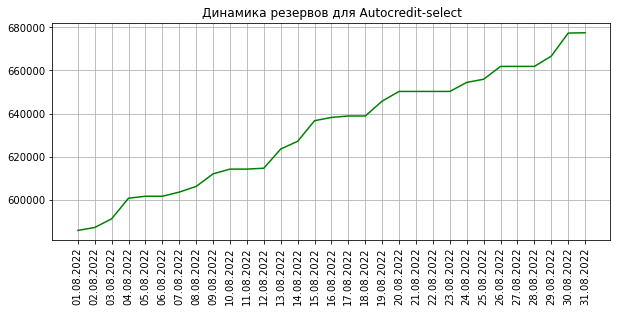

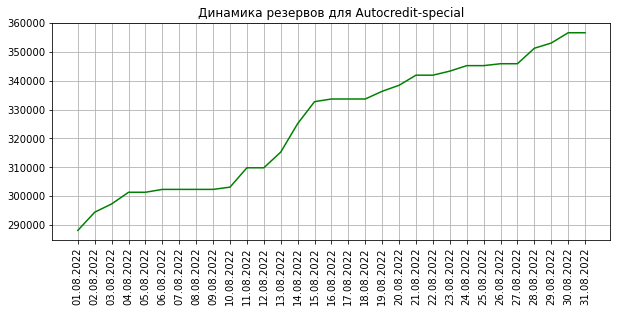

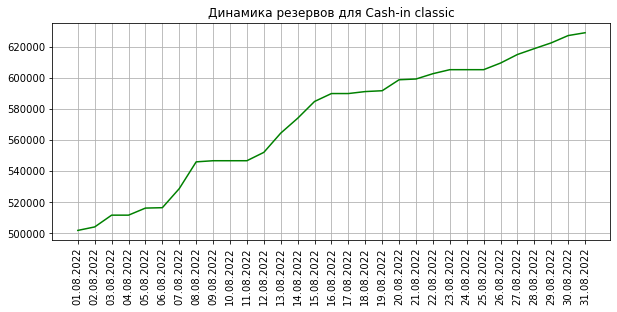

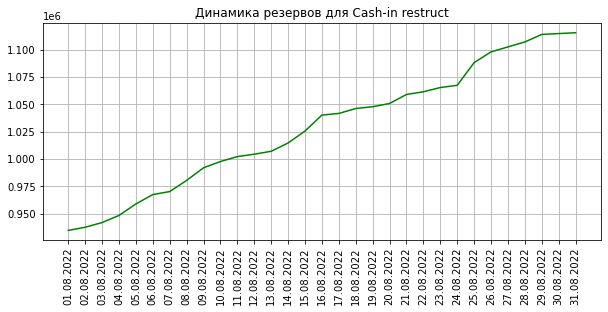

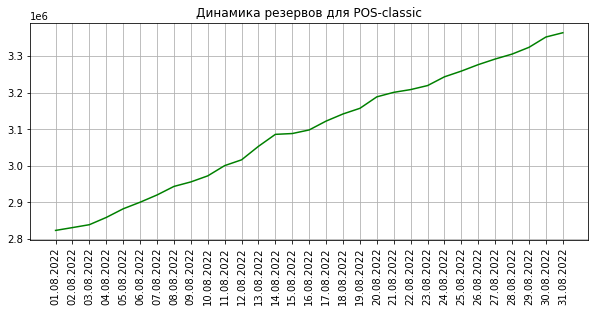

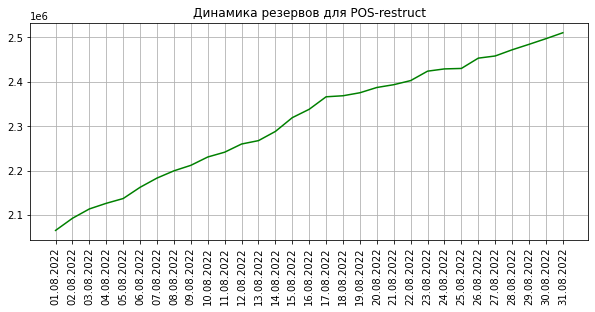

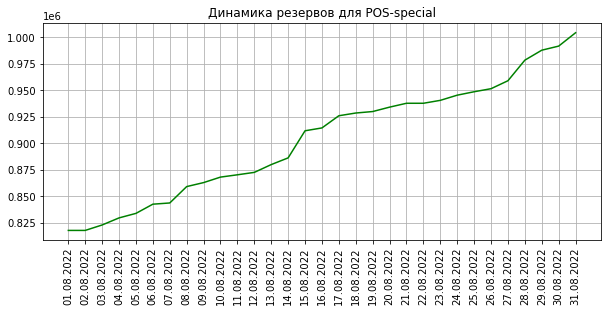

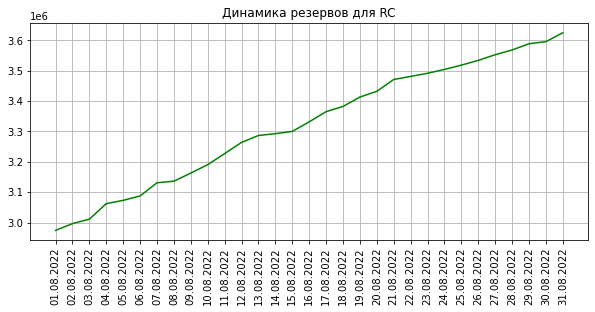

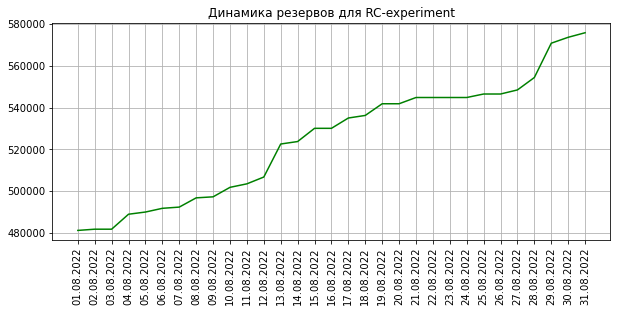

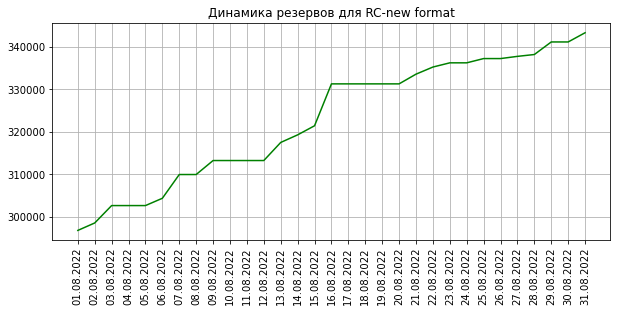

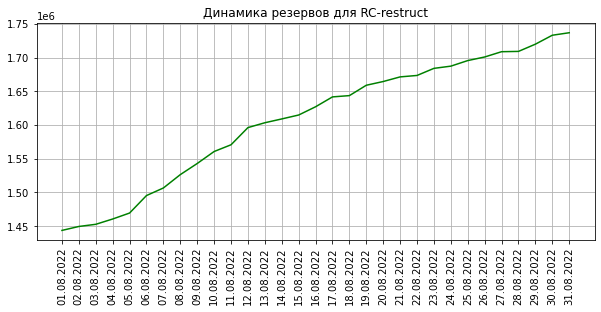

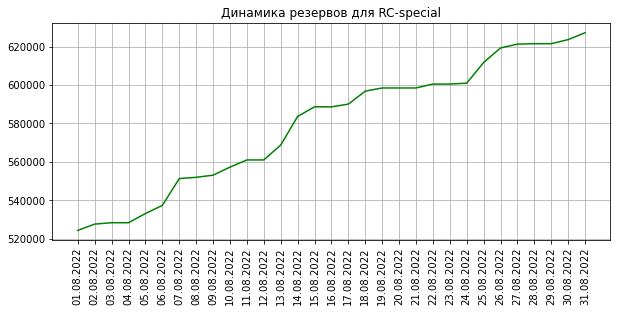

In [248]:
reserve_calc_in_prods (dates, df_cd)

In [241]:
df_check = df_cd.merge(df_ct, on = 'id_credit_type').groupby('name_credit_type')['id_credit'].count().reset_index().sort_values(by = 'id_credit', ascending = False)
df_check

,name_credit_type,id_credit
11,RC,265
8,POS-classic,241
9,POS-restruct,191
1,Autocredit-classic,178
14,RC-restruct,121
7,Cash-in restruct,79
10,POS-special,77
3,Autocredit-restruct,63
6,Cash-in classic,48
12,RC-experiment,44


Очевидно, вид графика роста резервов зависит от количества кредитов данного вида продукта: чем больше количество кредитов, тем более сглаженный график роста резервов.

<AxesSubplot:>

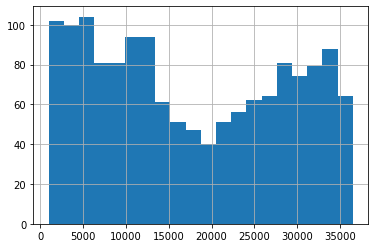

In [167]:
#для сегментации кредитов и дальнейшего рассчета сумм резерва в разрезе размера выданного кредита
#построим распределение по размеру кредита
df_cd['amt_instalment'].hist(bins = 20)

In [242]:
df_cd['amt_instalment'].max() #максимальный размер кредита

36495

In [243]:
df_cd['amt_instalment'].min() #минимальный размер кредита

965

Сегментируем по размеру кредита с интервалом 5000 руб.

In [249]:
#функция для отслеживания резервов в разрезе суммы кредита
def reserve_calc_in_amt (dates, df):
    #функция берет на вход исходный датафрейм с кредитами,создает дополнительный столбец с сегментацией:
    df['amt_segment'] = df['amt_instalment']//5000
    #группирует их по сегментам размера кредита и длительности просрочки:
    df_prod = df.groupby(['amt_segment','last_inst_payment'])['amt_instalment'].sum().reset_index()
    for s in df_prod['amt_segment'].unique(): #делается срез по каждому сегменту
        df = df_prod.loc[df_prod['amt_segment'] == s]
        df_for_graf = reserve_calc_to_dates(dates, df) #к полученному срезу применяется функция рассчета сумм резерва по дням
        plt.figure(figsize = (10,4)) #построение графика для отслеживания
        plt.title("Динамика резервов для сегмента до "+str((s+1)*5000))
        plt.plot(df_for_graf['date'], df_for_graf['sum_reserve_to_date'], color = 'g')
        plt.xticks(rotation = 'vertical')
        plt.grid()
        plt.show()

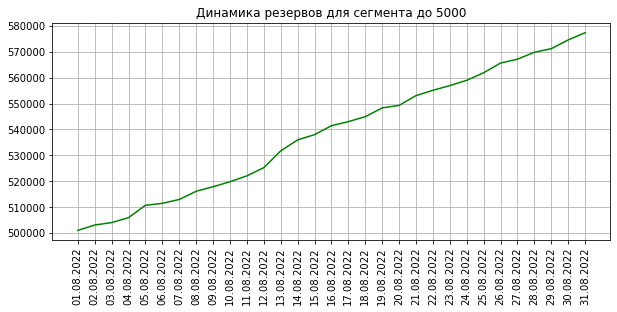

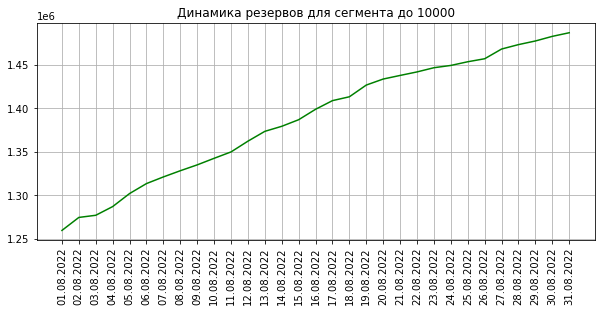

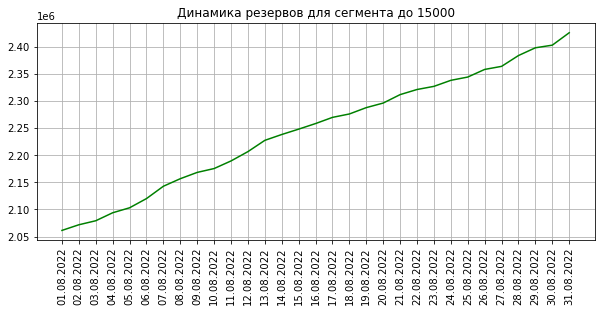

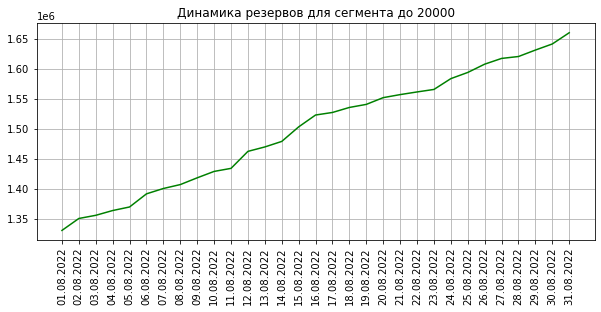

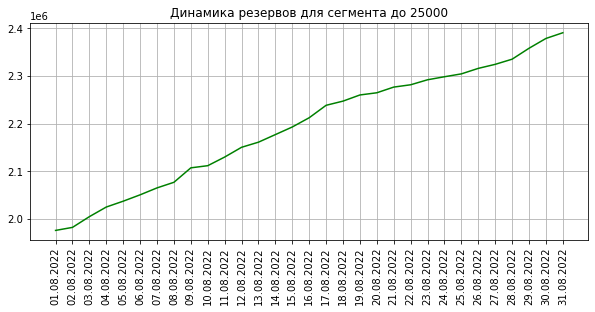

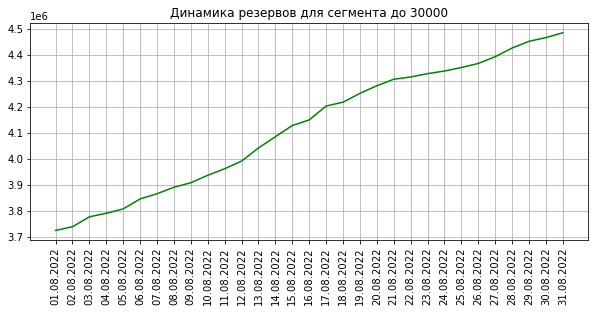

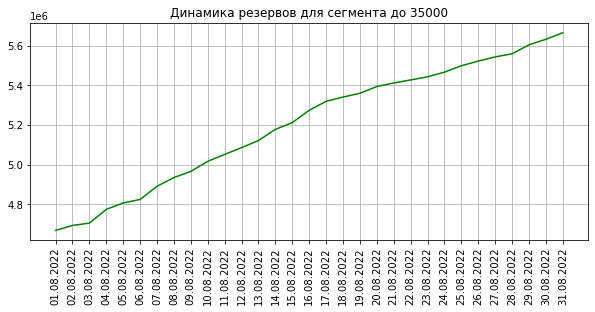

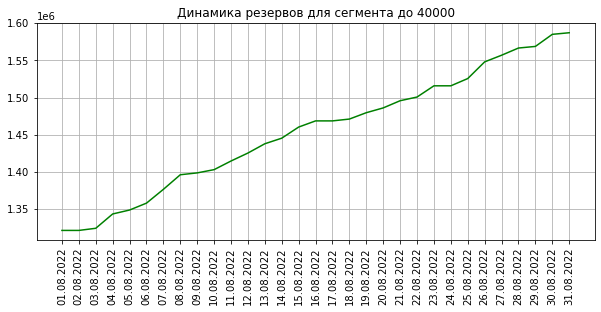

In [250]:
reserve_calc_in_amt (dates, df_cd)